<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

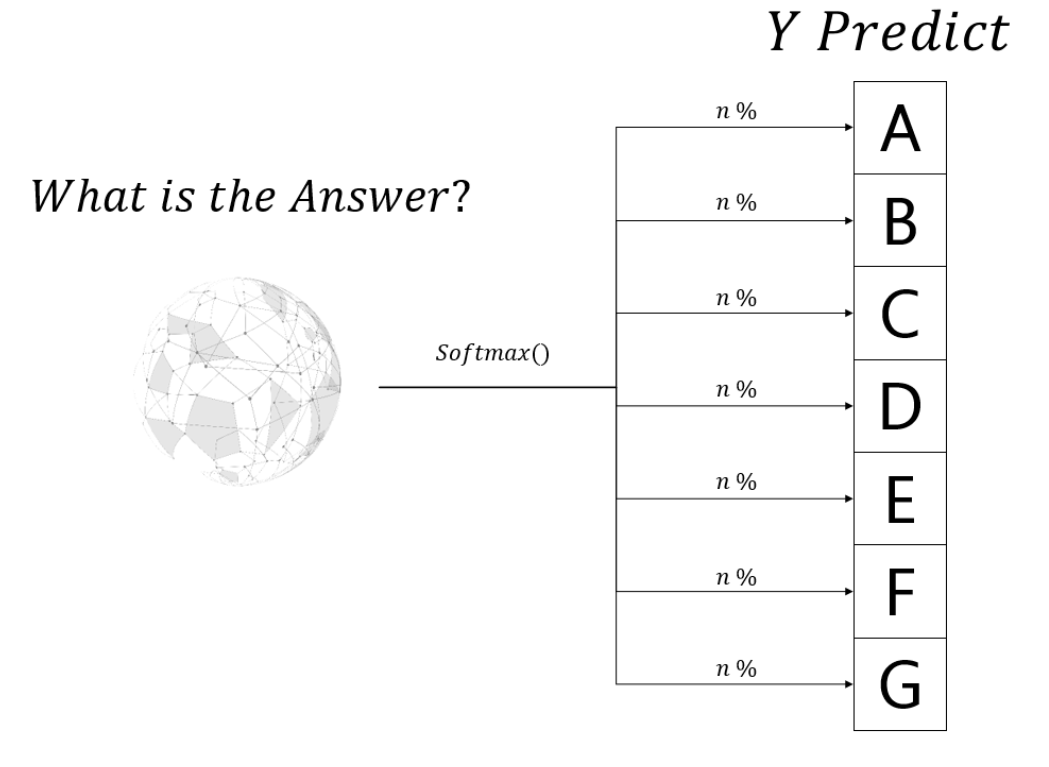

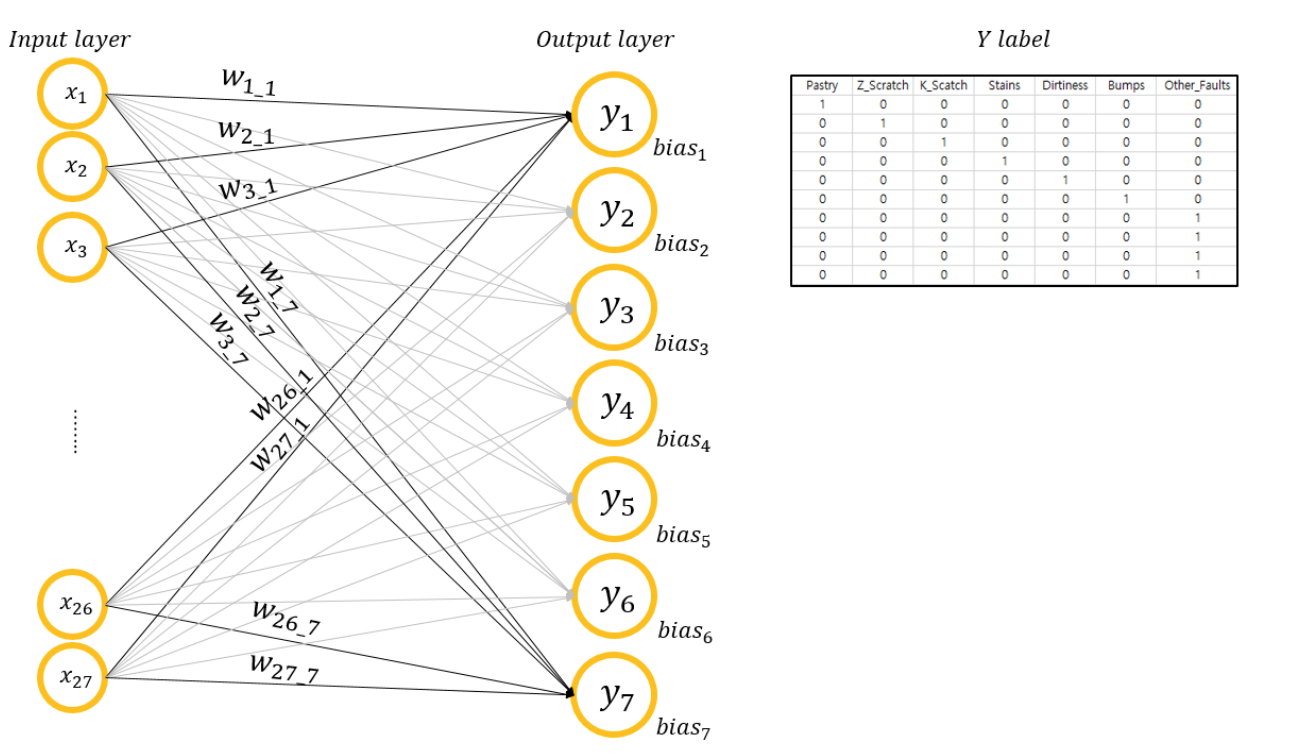

# softmax()

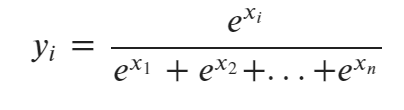

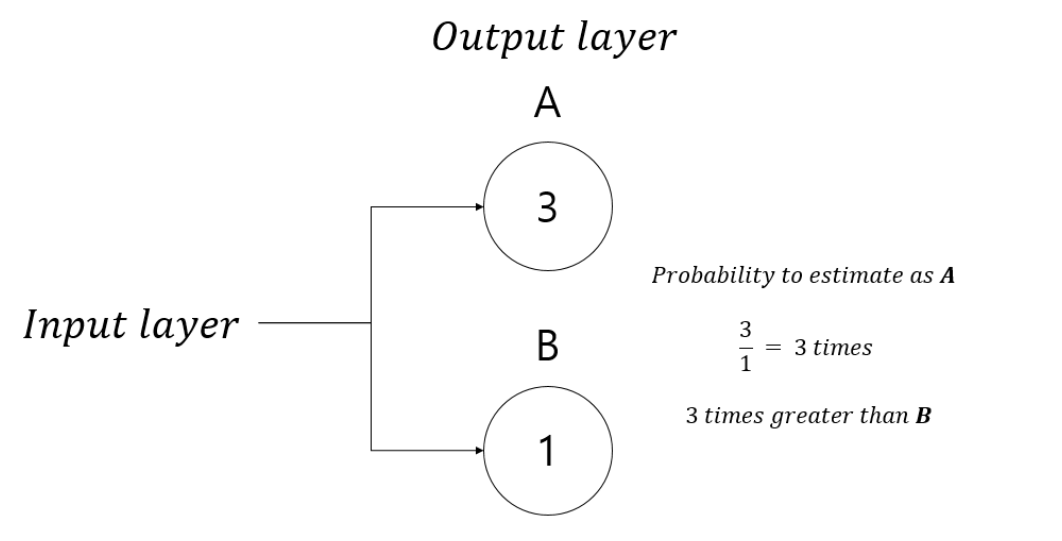

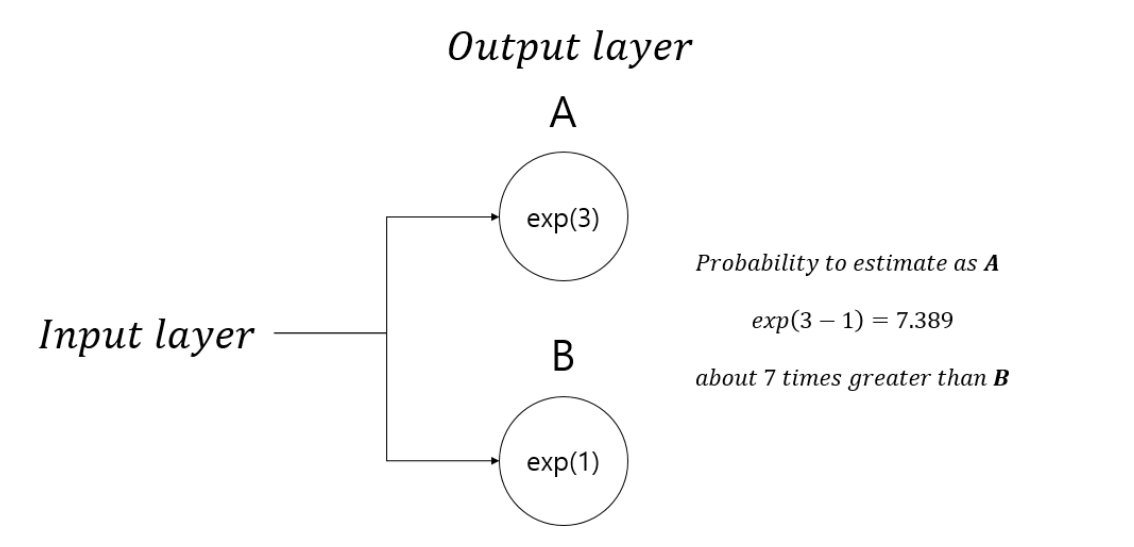

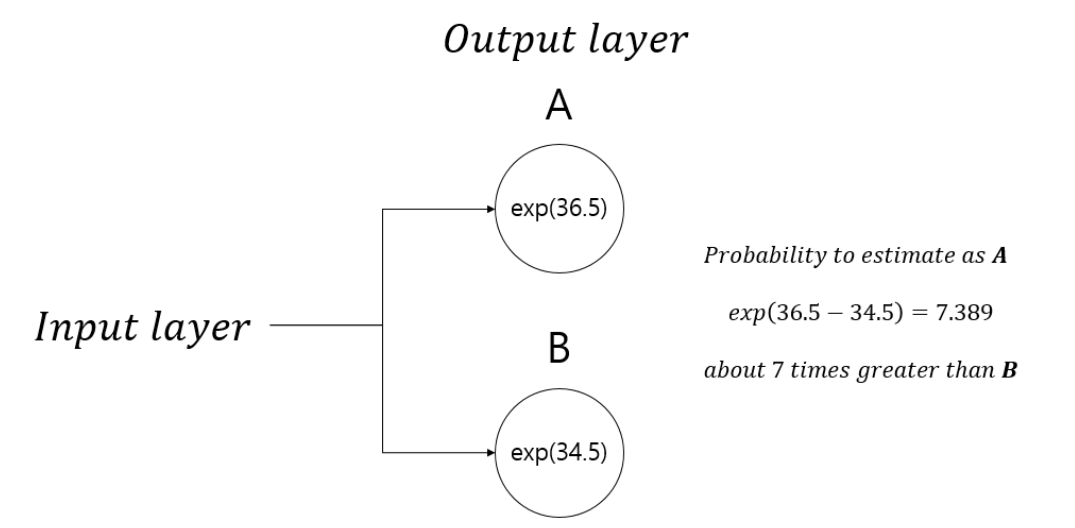

In [ ]:
import numpy as np

def func_exp(x):
    return np.round(np.exp(x),3)

In [ ]:
func_exp(36.5 -34.5)



7.389

# y = xw + b ▼ 

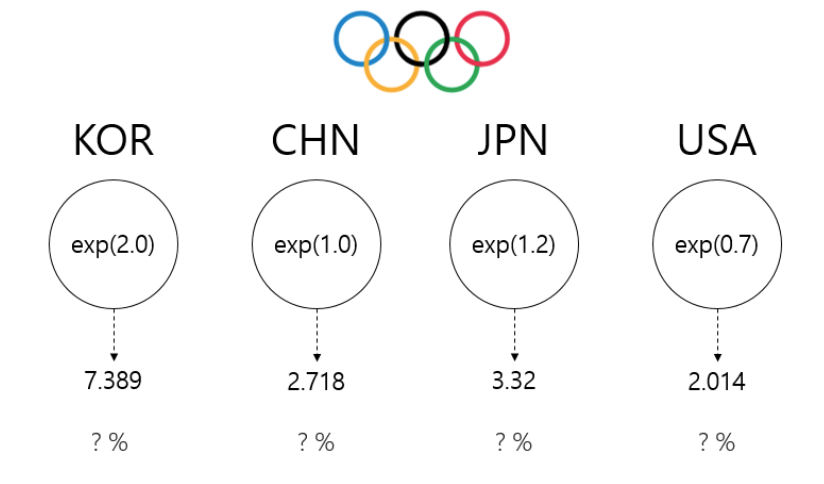

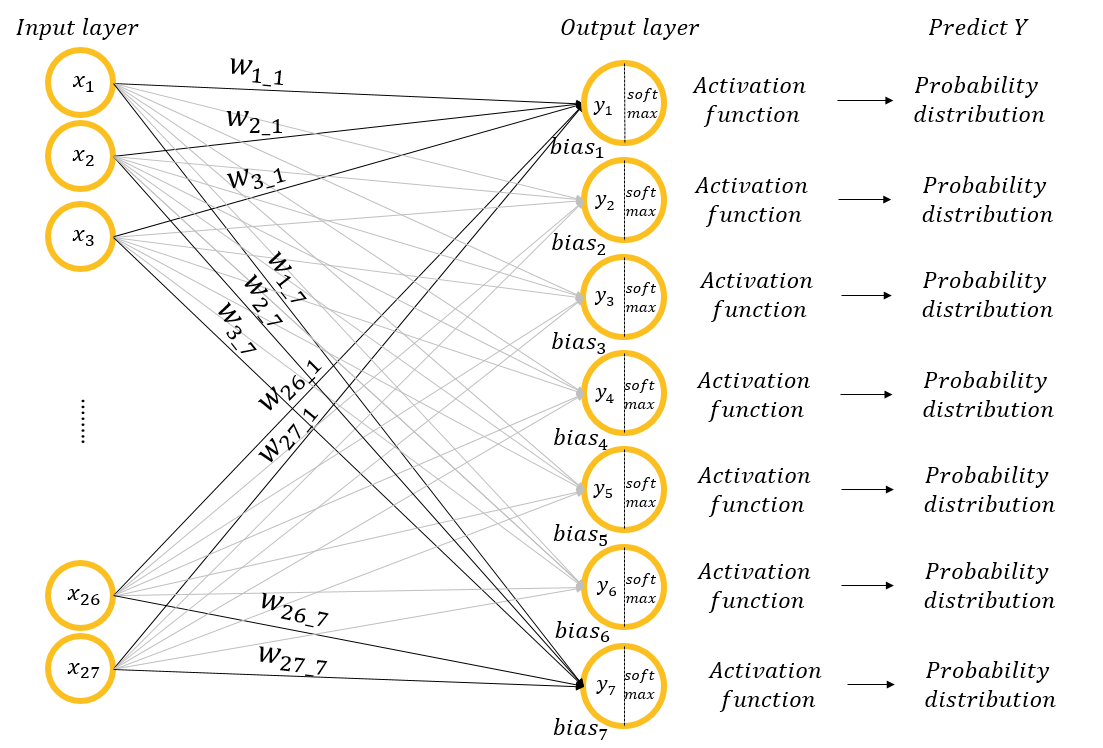

# Softmax()

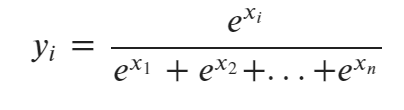

#  ▼  y = xw + b

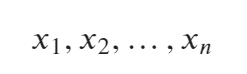

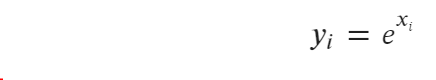

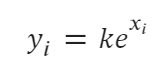

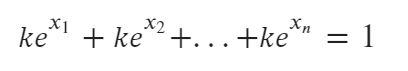

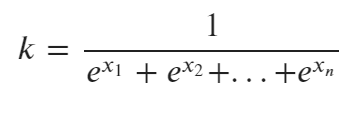

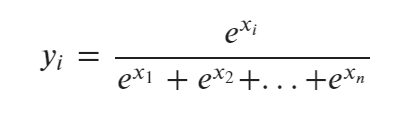

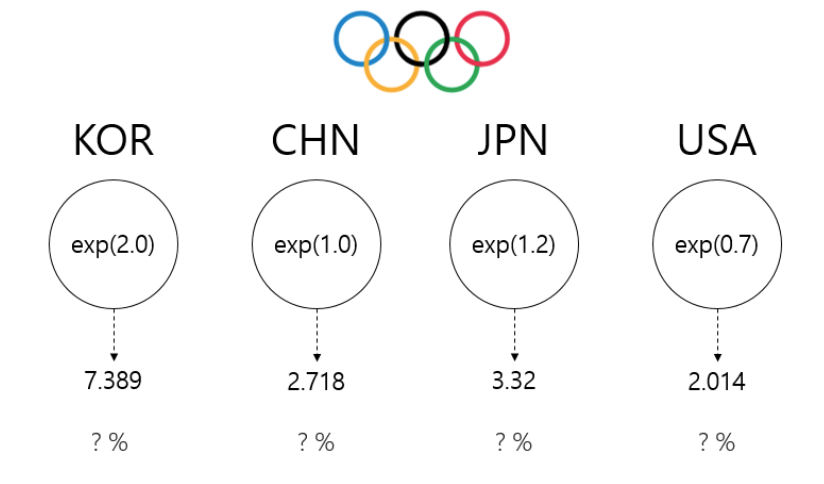

In [11]:
# 첫 번째 문제 : 오버플로우
Country = {'KOR' : 2000.0,
           'CHN' : 1000.0,
           'JPN' : -120.0,
           'USA' : -700.0}

In [12]:
e_row = []
for i in Country.values():
    #print(i)

    e = func_exp(i)
    e_row.append(e)
print(e_row)

[inf, inf, 0.0, 0.0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [13]:
np.exp(1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

In [14]:
# 두 번째 문제: 신경망이 모든 결괏값을 음수로 출력하게 되는 경우
Country = {'KOR' : -200.0,
           'CHN' : -100.0,
           'JPN' : -120.0,
           'USA' : -700.0}

In [15]:
e_row = []
for i in Country.values():
    #print(i)

    e = func_exp(i)
    e_row.append(e)

k= 1/np.sum(e_row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [16]:
for e in e_row:
  Win_Prob = e * k
  print("Win_Prob({}) : {:.3f}% ".format(e,Win_Prob *100))

Win_Prob(0.0) : nan% 
Win_Prob(0.0) : nan% 
Win_Prob(0.0) : nan% 
Win_Prob(0.0) : nan% 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


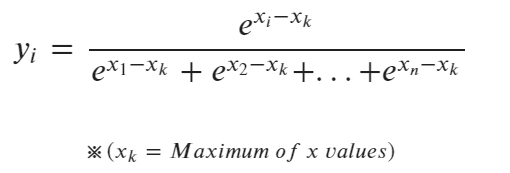

In [17]:
Country = {'KOR' : 2000.0,
           'CHN' : 1000.0,
           'JPN' : -120.0,
           'USA' : -700.0}

In [20]:
case_0 = np.exp(2000.0 - 2000.0)
case_1 = np.exp(1000.0 - 2000.0)
case_2 = np.exp(-120.0 - 2000.0)
case_3 = np.exp(-700.0 - 2000.0)

print(case_0)
print(case_1)
print(case_2)
print(case_3)

1.0
0.0
0.0
0.0


## 소프트맥스 활성화 함수

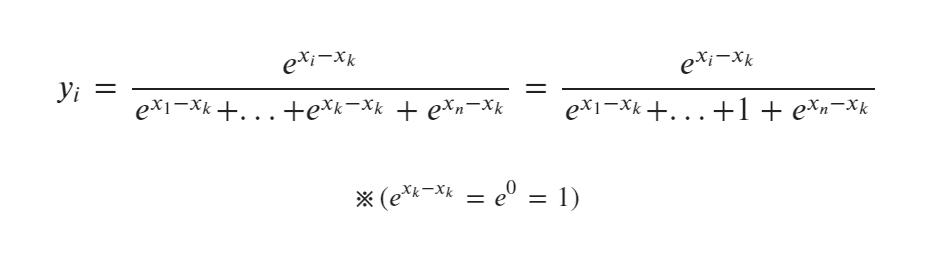

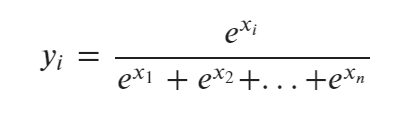

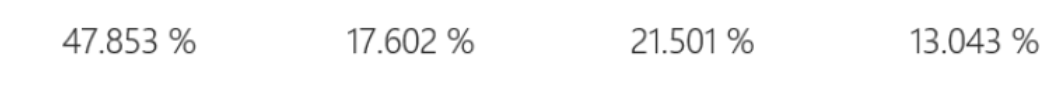

In [23]:
Country = {'KOR' : 2.0,
           'CHN' : 1.0,
           'JPN' : 1.2,
           'USA' : 0.7}

In [24]:
case_0 = np.exp(2.0 - 2.0)
case_1 = np.exp(1.0 - 2.0)
case_2 = np.exp(1.2 - 2.0)
case_3 = np.exp(0.7 - 2.0)

print(case_0)
print(case_1)
print(case_2)
print(case_3)

1.0
0.36787944117144233
0.44932896411722156
0.2725317930340126


In [26]:
case_0_prob =(case_0) / (case_0 + case_1+ case_2 + case_3)
case_1_prob =(case_1) / (case_0 + case_1+ case_2 + case_3)
case_2_prob =(case_2) / (case_0 + case_1+ case_2 + case_3)
case_3_prob =(case_3) / (case_0 + case_1+ case_2 + case_3)

print(case_0_prob * 100)
print(case_1_prob * 100)
print(case_2_prob * 100)
print(case_3_prob * 100)

47.85283839601912
17.604075447594855
21.50166630655208
13.041419849833936


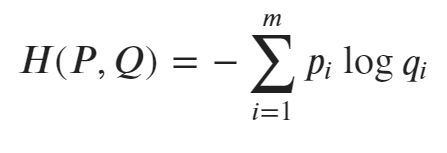

In [27]:
q = 0.000
print(np.log(q))

-inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


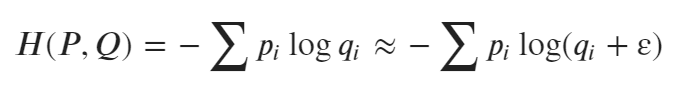

In [28]:
Real_Prob = np.array([0.526, 0.295, 0.179])
AIRIM_Q   = np.array([0.800, 0.2, 0.000])  

In [29]:
class Entropy():
    def __init__(self, Prob, Q):
        self.Prob = Prob 
        self.Q    = Q

In [30]:
def out_entropy(self, H_Q = True):
    global cross_entropy, info_entropy
    amount_of_info_row = []

    if H_Q == True:
        for i in range(len(self.Q)):
            amount_of_info = - self.Prob[i] * (np.log(self.Q[i] + epsilon))
            amount_of_info_row.append(amount_of_info)
    
        cross_entropy = np.sum(amount_of_info_row)
        print("--- Cross Entropy ---")

        return np.round(cross_entropy,3)


    else :
        for p in self.Prob:
            amount_of_info = -p * np.log(p)
            amount_of_info_row.append(amount_of_info)
        
        info_entropy = np.sum(amount_of_info_row)
        print("--- Infomation Entropy ---")
    
        return np.round(info_entropy,3)

Entropy.entropy_epsilon = out_entropy

In [31]:
epsilon = 1.0e-10

In [35]:
Cross_E= Entropy(Real_Prob, AIRIM_Q)

In [36]:
Cross_E_value = Cross_E.entropy_epsilon(H_Q=True)
print("Cross_E_value : ", Cross_E_value)

--- Cross Entropy ---
Cross_E_value :  4.714
